In [1]:
import warnings

# Filter out the specific warning
warnings.filterwarnings("ignore", message="Unable to import Axes3D", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

In [3]:
# Load Data
df = pd.read_csv("Business_data_usa.csv")
df.head()

,business_status,formatted_address,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,photos,place_id,plus_code,rating,reference,types,user_ratings_total
0,OPERATIONAL,"215 S Depeyster St, Kent, OH 44240, United States","{'location': {'lat': 41.152459, 'lng': -81.356...",https://maps.gstatic.com/mapfiles/place_api/ic...,#909CE1,https://maps.gstatic.com/mapfiles/place_api/ic...,Kent State University Hotel & Conference Center,{'open_now': True},"[{'height': 1000, 'html_attributions': ['<a hr...",ChIJq4w7syYlMYgRG0mhD2AvutE,"{'compound_code': '5J2V+XH Kent, Ohio, USA', '...",4.5,ChIJq4w7syYlMYgRG0mhD2AvutE,"['bar', 'lodging', 'restaurant', 'food', 'poin...",1041
1,OPERATIONAL,"4406 OH-43, Kent, OH 44240, United States","{'location': {'lat': 41.1092334, 'lng': -81.34...",https://maps.gstatic.com/mapfiles/place_api/ic...,#909CE1,https://maps.gstatic.com/mapfiles/place_api/ic...,Hampton Inn Kent/Akron Area,NaN,"[{'height': 1365, 'html_attributions': ['<a hr...",ChIJsbDpl_svMYgRlzWhQLad2wg,"{'compound_code': '4M53+M7 Kent, Ohio, USA', '...",3.9,ChIJsbDpl_svMYgRlzWhQLad2wg,"['lodging', 'point_of_interest', 'establishment']",576
2,OPERATIONAL,"1215 Sanctuary View Dr, Kent, OH 44240, United...","{'location': {'lat': 41.11150689999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,#909CE1,https://maps.gstatic.com/mapfiles/place_api/ic...,Holiday Inn Express & Suites Kent - University...,NaN,"[{'height': 1536, 'html_attributions': ['<a hr...",ChIJCWhBG_ovMYgRpDRlPiDh3bA,"{'compound_code': '4M62+J5 Kent, Ohio, USA', '...",4.5,ChIJCWhBG_ovMYgRpDRlPiDh3bA,"['lodging', 'point_of_interest', 'establishment']",413
3,OPERATIONAL,"4422 Edson Rd, Kent, OH 44240, United States","{'location': {'lat': 41.1094954, 'lng': -81.34...",https://maps.gstatic.com/mapfiles/place_api/ic...,#909CE1,https://maps.gstatic.com/mapfiles/place_api/ic...,Days Inn by Wyndham Kent - Akron,{'open_now': True},"[{'height': 400, 'html_attributions': ['<a hre...",ChIJQ-NUmvsvMYgRH23kANK6CLo,"{'compound_code': '4M53+RX Kent, Ohio, USA', '...",3.4,ChIJQ-NUmvsvMYgRH23kANK6CLo,"['lodging', 'point_of_interest', 'establishment']",536
4,OPERATIONAL,"4380 Edson Rd, Kent, OH 44240, United States","{'location': {'lat': 41.10885040000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,#909CE1,https://maps.gstatic.com/mapfiles/place_api/ic...,Super 8 by Wyndham Kent/Akron Area,{'open_now': True},"[{'height': 400, 'html_attributions': ['<a hre...",ChIJA1ilbfwvMYgR23uNF7GrGJc,"{'compound_code': '4M53+CR Kent, Ohio, USA', '...",2.9,ChIJA1ilbfwvMYgR23uNF7GrGJc,"['lodging', 'point_of_interest', 'establishment']",492


# Data Exploration.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_status        60 non-null     object 
 1   formatted_address      60 non-null     object 
 2   geometry               60 non-null     object 
 3   icon                   60 non-null     object 
 4   icon_background_color  60 non-null     object 
 5   icon_mask_base_uri     60 non-null     object 
 6   name                   60 non-null     object 
 7   opening_hours          24 non-null     object 
 8   photos                 60 non-null     object 
 9   place_id               60 non-null     object 
 10  plus_code              60 non-null     object 
 11  rating                 60 non-null     float64
 12  reference              60 non-null     object 
 13  types                  60 non-null     object 
 14  user_ratings_total     60 non-null     int64  
dtypes: float

In [5]:
df.nunique()

business_status           1
formatted_address        60
geometry                 60
icon                      2
icon_background_color     2
icon_mask_base_uri        2
name                     60
opening_hours             2
photos                   60
place_id                 60
plus_code                60
rating                   19
reference                60
types                     3
user_ratings_total       57
dtype: int64

In [6]:
# Statistical Analysis
df.describe()

,rating,user_ratings_total
count,60.000000,60.000000
mean,4.033333,1058.616667
std,0.484214,1174.317733
min,2.700000,49.000000
25%,3.800000,413.750000
50%,4.200000,588.500000
75%,4.400000,1397.500000
max,4.900000,6212.000000


# Exploratory Data Analysis

# Distribution of ratings across different locations

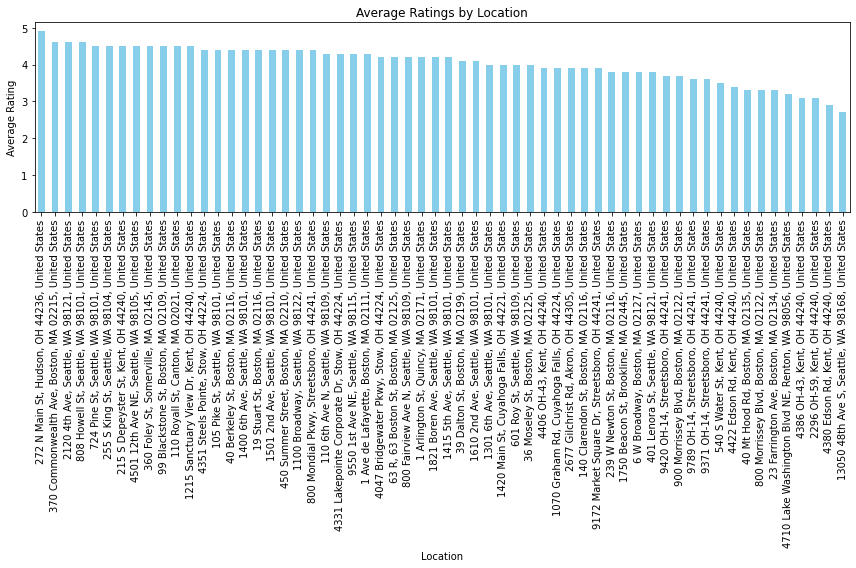

In [7]:
# Group the data by formatted_address and calculate mean rating
ratings_by_location = df.groupby('formatted_address')['rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
ratings_by_location.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution, correlations, and patterns

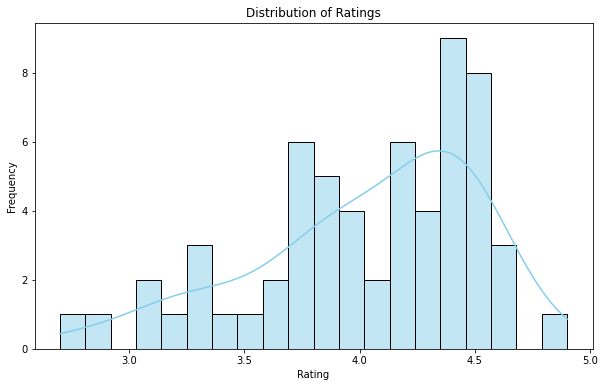

In [8]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

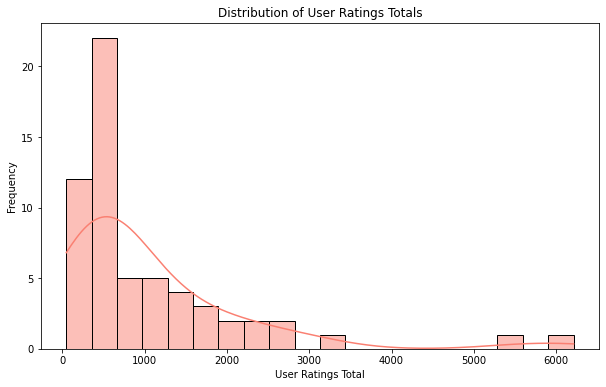

In [9]:
# Distribution of user ratings totals
plt.figure(figsize=(10, 6))
sns.histplot(df['user_ratings_total'], bins=20, kde=True, color='salmon')
plt.title('Distribution of User Ratings Totals')
plt.xlabel('User Ratings Total')
plt.ylabel('Frequency')
plt.show()

How ratings vary across different types of businesses (To identify trends)

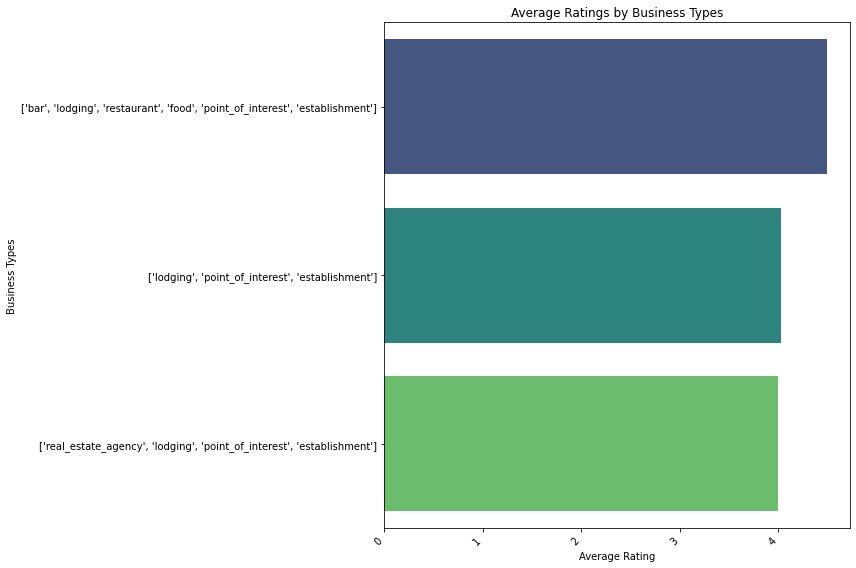

In [10]:
# Calculate average rating for each business type
average_ratings = df.groupby('types')['rating'].mean().reset_index()

# Sort the dataframe by average rating in descending order
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='types', data=average_ratings, hue='types', palette='viridis', dodge=False)
plt.title('Average Ratings by Business Types')
plt.xlabel('Average Rating')
plt.ylabel('Business Types')
plt.xticks(rotation=45, ha='right')
plt.legend([], frameon=False)  # To remove the legend
plt.tight_layout()
plt.show()


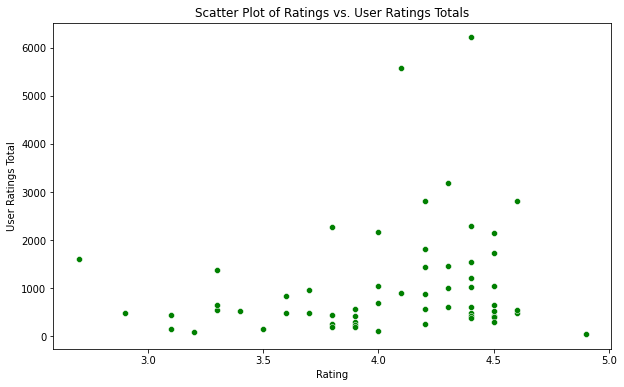

In [11]:
# Scatter plot of ratings vs. user ratings totals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='user_ratings_total', data=df, color='green')
plt.title('Scatter Plot of Ratings vs. User Ratings Totals')
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.show()

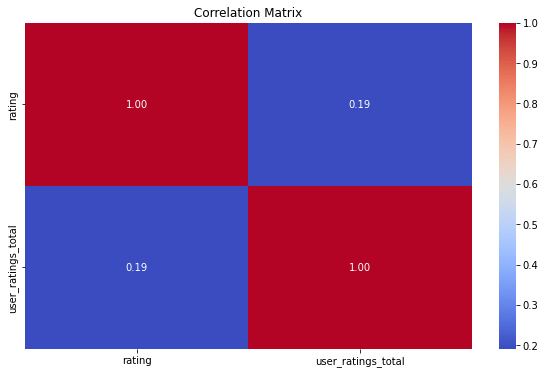

In [12]:
# Filter the data to include only relevant numerical columns
numerical_df = df[['rating', 'user_ratings_total']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

There is a positive correlation of approximately 0.19 between the rating and the number of user ratings.

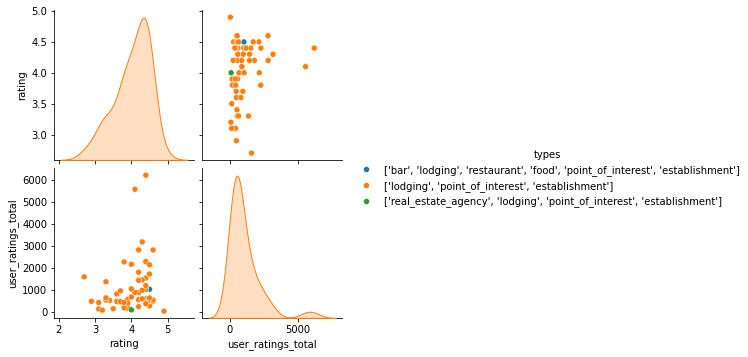

In [13]:
# Scatter plot matrix for selected variables
sns.pairplot(df[['rating', 'user_ratings_total', 'types']], hue='types')
plt.show()


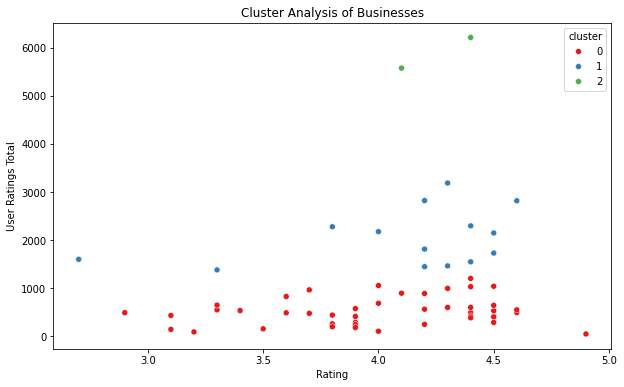

In [14]:
# Cluster analysis using KMeans (example)
from sklearn.cluster import KMeans

# Assuming we want to cluster based on rating and user ratings total
X = df[['rating', 'user_ratings_total']]

# Specify the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(X)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='user_ratings_total', hue='cluster', data=df, palette='Set1')
plt.title('Cluster Analysis of Businesses')
plt.xlabel('Rating')
plt.ylabel('User Ratings Total')
plt.show()


# Regions with higher-rated business

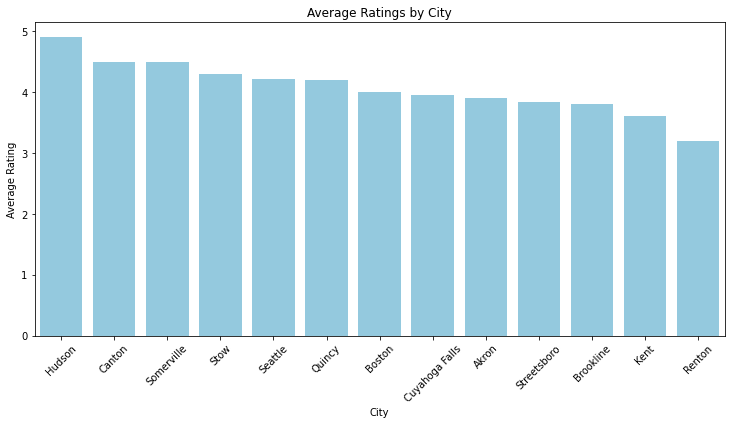

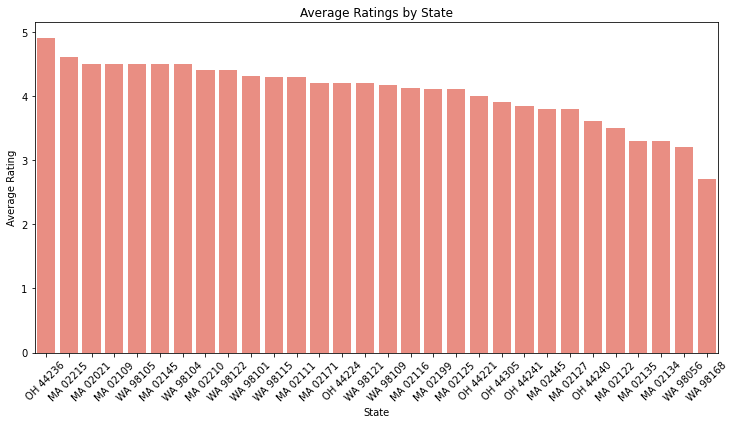

In [15]:
# Extract city or state information from formatted_address
df['city'] = df['formatted_address'].apply(lambda x: x.split(', ')[-3])
df['state'] = df['formatted_address'].apply(lambda x: x.split(', ')[-2])

# Group the data by city or state and calculate mean or sum of ratings
ratings_by_city = df.groupby('city')['rating'].mean().sort_values(ascending=False)
ratings_by_state = df.groupby('state')['rating'].mean().sort_values(ascending=False)

# Plot by city
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=ratings_by_city.index, y=ratings_by_city.values, color='skyblue')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot by state
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
sns.barplot(x=ratings_by_state.index, y=ratings_by_state.values, color='salmon')
plt.title('Average Ratings by State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()